# NIGERIAN BREWERIES

Nigerian Breweries Plc is a Nigeria-based brewing company. The Company is engaged in brewing, marketing, and selling of lager, stout, non-alcoholic malt drinks and soft drinks. The Company's brands include Star lager beer; Gulder lager beer; Maltina, which is a nourishing malt drink; Legend Extra Stout; Amstel Malta; Heineken lager beer; Maltina Sip-it; Fayrouz, which is a non-alcoholic soft drink; Climax, a herbal energy drink; Goldberg lager; Malta Gold; Life Continental lager; Ace Passion; Star Lite and Star Radler, among others. Its products include 33 Export lager beer, Williams dark ale, Turbo Kings dark ale, More lager beer, malt drinks, Maltina Pineapple, Maltina Vanilla, Amstel Malta Ultra, Star Radler Red Fruits, and Desperados, which is a premium beer brand with a distinctive tequila flavor. The Company also focuses on ancillary business, which includes manufacturers of bottles, cans, crown corks, labels, cartons, and plastic crates. The Company also has an export business.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
import statsmodels.tsa.api as smt


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Reading the data

In [2]:
df = pd.read_csv('NB Historical Data(7).csv')

In [3]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/21/2023,39.0,39.0,39.0,37.55,279.13K,0.00%
1,11/20/2023,39.0,40.0,39.0,39.00,5.42M,-2.50%
2,11/17/2023,40.0,40.0,39.0,38.50,442.82K,0.00%
3,11/16/2023,40.0,38.0,40.0,38.00,2.75M,5.26%
4,11/15/2023,38.0,38.0,38.0,38.00,1.55M,0.00%


##  Understanding the data

1. The 'Date' column represents the date of the stock price data.

2. The 'Price' column represents the stock price for the corresponding date.

3. The 'Open' column represents the opening price of the stock on the given date.

4. The 'High' column represents the highest price of the stock during the trading day.

5. The 'Low' column represents the lowest price of the stock during the trading day.

6. The 'Vol.' column represents the trading volume, indicating the total number of shares traded on the given date.

7. The 'Change%' column represents the percentage change in the stock price compared to the previous day.

In [4]:
df.shape

(1460, 7)

The dataset has over 1460 rows and 7 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1460 non-null   object 
 1   Price     1460 non-null   float64
 2   Open      1460 non-null   float64
 3   High      1460 non-null   float64
 4   Low       1460 non-null   float64
 5   Vol.      1460 non-null   object 
 6   Change %  1460 non-null   object 
dtypes: float64(4), object(3)
memory usage: 80.0+ KB


In [6]:
df.columns.to_list()

['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']

__Volume here is recognized as an object data type and not as float(number). Thus, we need to convert it to float__

In [7]:
df['Vol.'] = df['Vol.'].replace('[KMB]', '', regex=True).replace('', '1', regex=True).astype(float) * \
              df['Vol.'].str.extract(r'[\d\.]+([KMB])', expand=False).fillna(1).replace(['K','M','B'], [10**3, 10**6, 10**9]).astype(int)

##### This code removes 'K', 'M', or 'B' from the 'Vol.' column, converts the column to numeric values, and then multiplies by the appropriate factor to get the float values.

## Statistical Analysis of the Price.

In [8]:
df['Price'].describe()

count    1460.000000
mean       49.205445
std        20.420590
min        17.600000
25%        38.075000
50%        41.600000
75%        50.400000
max       122.140000
Name: Price, dtype: float64

In [9]:
df['Price'].median()

41.6

In [10]:
from scipy.stats import shapiro, skew, kurtosis

stat, p_value = shapiro(df['Price'])
print(f"Shapiro-Wilk test: Statistics={stat}, p-value={p_value}")

# Skewness
skewness = skew(df['Price'])
print(f"Skewness: {skewness}")

# Kurtosis
kurt = kurtosis(df['Price'])
print(f"Kurtosis: {kurt}")


Shapiro-Wilk test: Statistics=0.7876116633415222, p-value=5.818611613415938e-40
Skewness: 1.6891823611982586
Kurtosis: 2.264220010684859


In [11]:
df['Price'].mean()

49.20544520547936

## ANALYZING THE PRICE OF NB STOCKS

In [12]:
# Converting to time series
df['Date'] = pd.to_datetime(df['Date'])# To convert date column to datetime format

df.set_index('Date', inplace=True)# To set the date as index

Text(0.5, 1.0, 'Yearly Mean Price for NB')

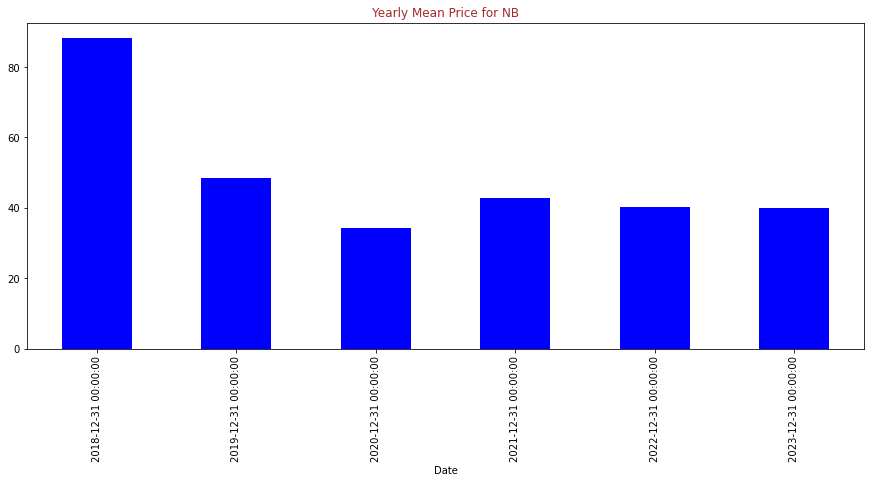

In [13]:
df['Price'].resample('A').mean().plot(kind='bar', figsize = (15,6), color='b')
plt.title('Yearly Mean Price for NB', color='brown')

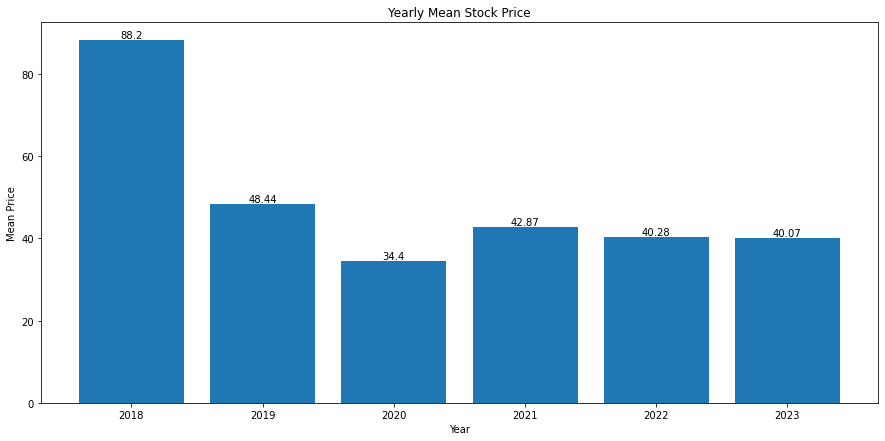

In [14]:
# Extract year from the index.
df['Year'] = df.index.year

# Calculate the yearly mean
yearly_mean = df.groupby('Year')['Price'].mean()

# Plotting
fig, ax = plt.subplots(figsize=(15, 7))
bars = ax.bar(yearly_mean.index, yearly_mean)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Customize plot
ax.set_xlabel('Year')
ax.set_ylabel('Mean Price')
ax.set_title('Yearly Mean Stock Price')

plt.show()


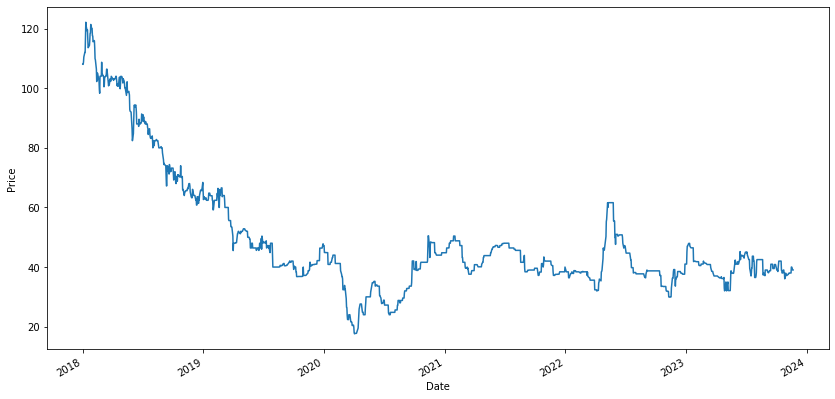

In [15]:
df['Price'].plot(figsize = (14,7))
plt.ylabel('Price')
plt.show()

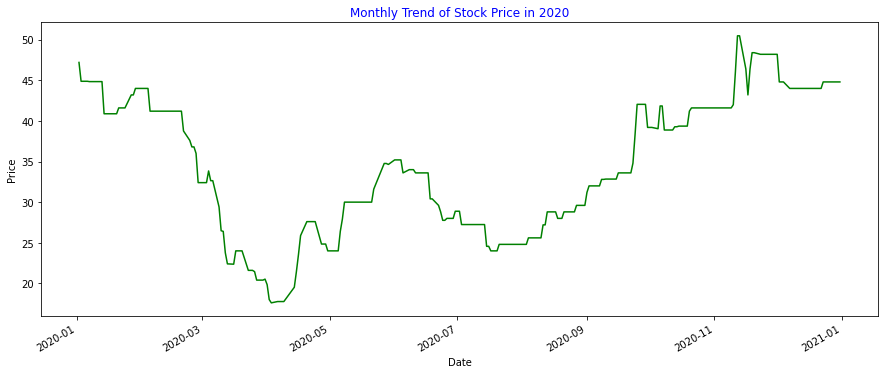

In [16]:
ax = df.loc['2020', 'Price'].plot(figsize=(15,6), color='g')
ax.set_title('Monthly Trend of Stock Price in 2020', color='b' ); 
ax.set_ylabel('Price');

In [17]:
import matplotlib.dates as mdates

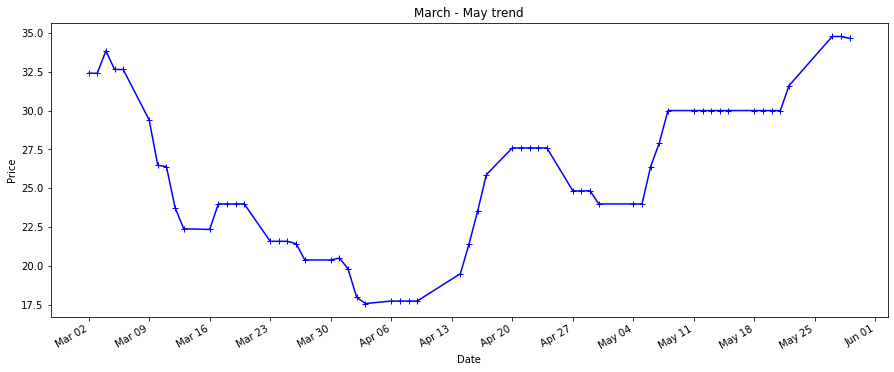

In [18]:
ax = df.loc['2020-03':'2020-05', 'Price'].plot(marker = '+',linestyle = '-', figsize = (15,6), color = 'b' )
ax.set_title('March - May trend')
ax.set_ylabel('Price')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

## Monthly trend for each year

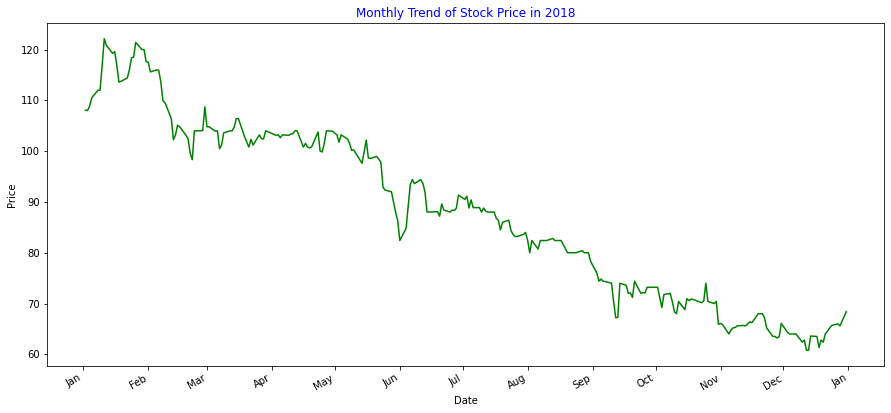

In [19]:

# Extract month from the index.
df['Month'] = df.index.month_name()

# Plotting
ax = df.loc['2018', 'Price'].plot(figsize=(15, 7), color='g')
ax.set_title('Monthly Trend of Stock Price in 2018', color='b')
ax.set_ylabel('Price')

# Format x-axis with month names
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()


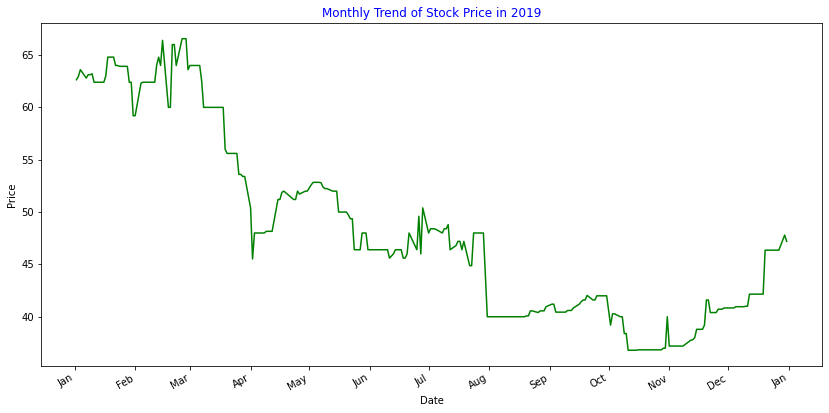

In [20]:
# Plotting
ax = df.loc['2019', 'Price'].plot(figsize=(14, 7), color='g')
ax.set_title('Monthly Trend of Stock Price in 2019', color='b')
ax.set_ylabel('Price')

# Format x-axis with month names
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()


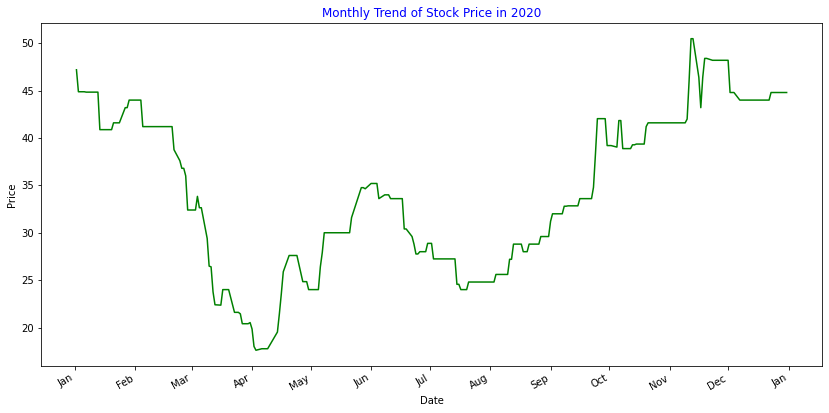

In [21]:
# Plotting
ax = df.loc['2020', 'Price'].plot(figsize=(14, 7), color='g')
ax.set_title('Monthly Trend of Stock Price in 2020', color='b')
ax.set_ylabel('Price')

# Format x-axis with month names
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()


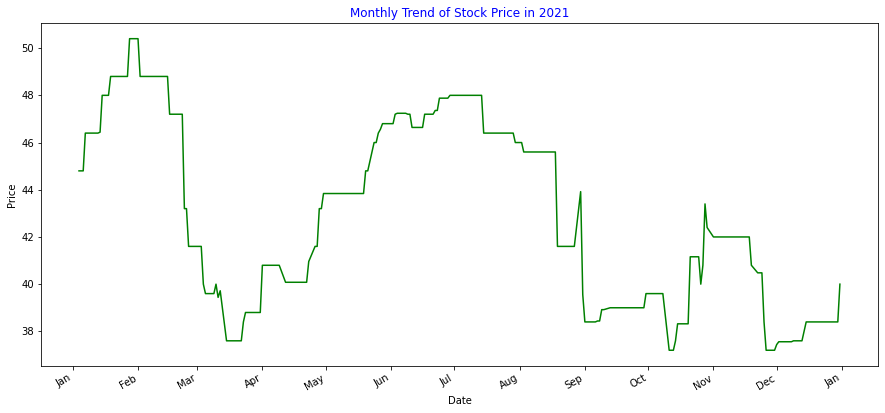

In [22]:
# Plotting
ax = df.loc['2021', 'Price'].plot(figsize=(15, 7), color='g')
ax.set_title('Monthly Trend of Stock Price in 2021', color='b')
ax.set_ylabel('Price')

# Format x-axis with month names
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()


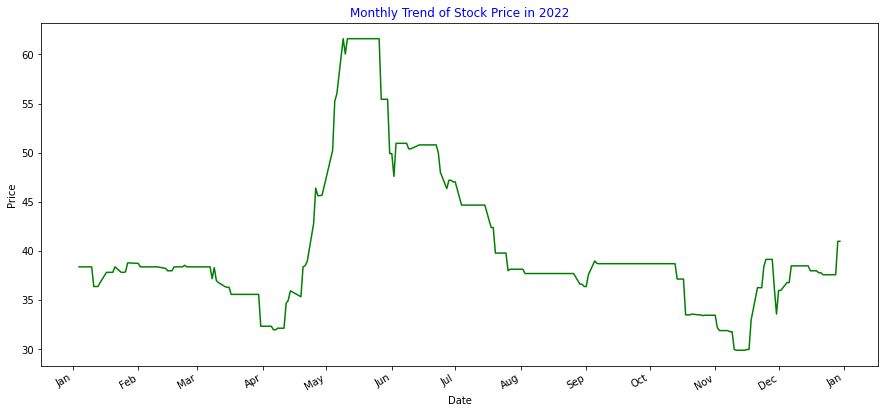

In [23]:
# Plotting
ax = df.loc['2022', 'Price'].plot(figsize=(15, 7), color='g')
ax.set_title('Monthly Trend of Stock Price in 2022', color='b')
ax.set_ylabel('Price')

# Format x-axis with month names
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()


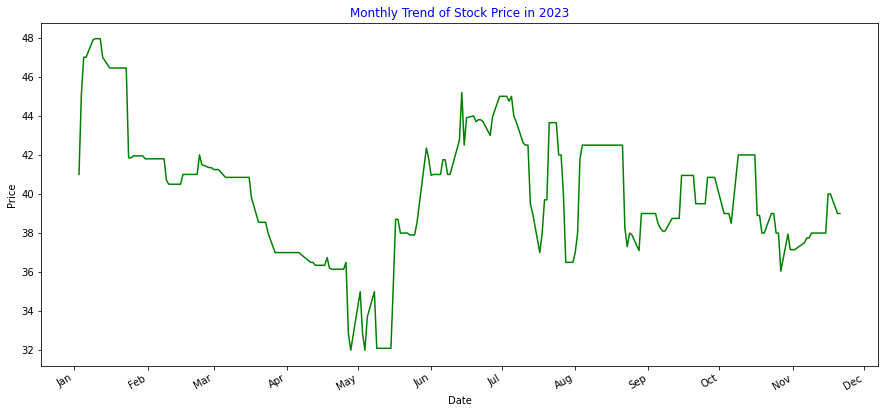

In [24]:
# Plotting
ax = df.loc['2023', 'Price'].plot(figsize=(15, 7), color='g')
ax.set_title('Monthly Trend of Stock Price in 2023', color='b')
ax.set_ylabel('Price')

# Format x-axis with month names
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()


### VOLUME ANALYSIS

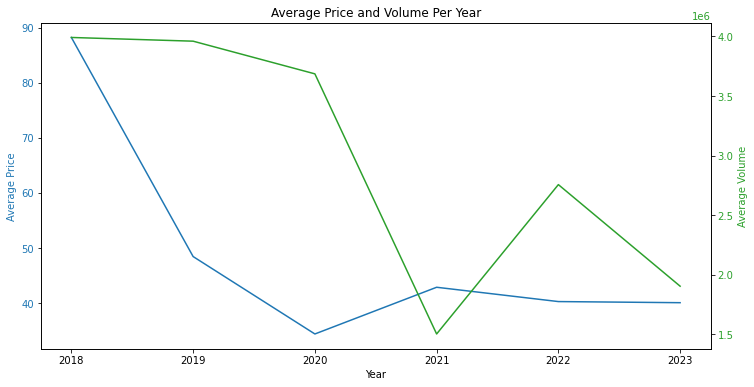

In [25]:
# Group by year and calculate the average price and volume
annual_stats = df.groupby('Year').agg({'Price': 'mean', 'Vol.': 'mean'}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average price
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Price', color=color)
ax1.plot(annual_stats['Year'], annual_stats['Price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for volume
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Average Volume', color=color)
ax2.plot(annual_stats['Year'], annual_stats['Vol.'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Display the plot
plt.title('Average Price and Volume Per Year')
plt.show()


In [26]:
# Print out the annual statistics
print("Year\tAverage Price\tAverage Volume")
for index, row in annual_stats.iterrows():
    print(f"{int(row['Year'])}\t{row['Price']:.2f}\t\t{row['Vol.']:.2f}")


Year	Average Price	Average Volume
2018	88.20		3991739.76
2019	48.44		3960539.39
2020	34.40		3686093.13
2021	42.87		1501186.94
2022	40.28		2755790.52
2023	40.07		1902634.82


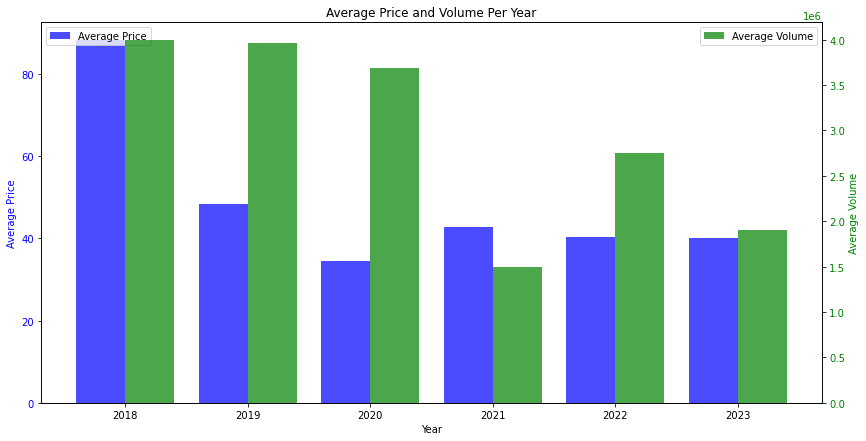

In [27]:
# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar chart for average price on the left y-axis
ax1.bar(annual_stats['Year'] - 0.2, annual_stats['Price'], width=0.4, label='Average Price', alpha=0.7, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a twin axes sharing the xaxis
ax2 = ax1.twinx()
ax2.bar(annual_stats['Year'] + 0.2, annual_stats['Vol.'], width=0.4, label='Average Volume', alpha=0.7, color='green')
ax2.set_ylabel('Average Volume', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Set title
plt.title('Average Price and Volume Per Year')

# Display the plot
plt.show()


## CORRELATION BETWEEN NB STOCK PRICE AND VOLUME TRADED

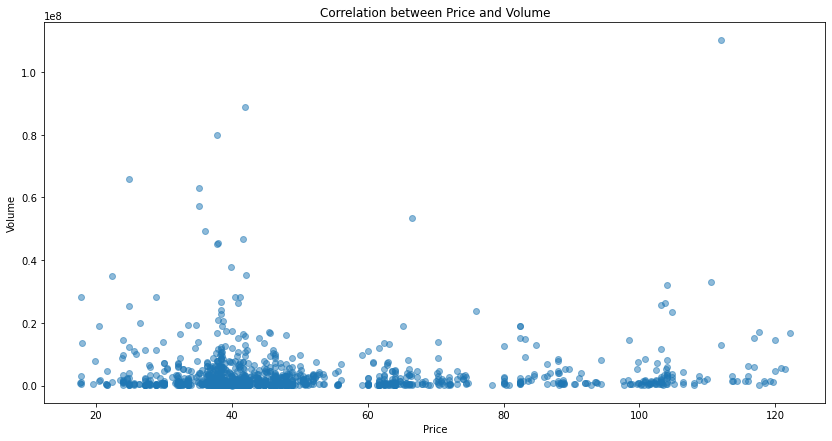

In [28]:
plt.figure(figsize=(14, 7))
plt.scatter(df['Price'], df['Vol.'], alpha=0.5)
plt.title('Correlation between Price and Volume')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.show()

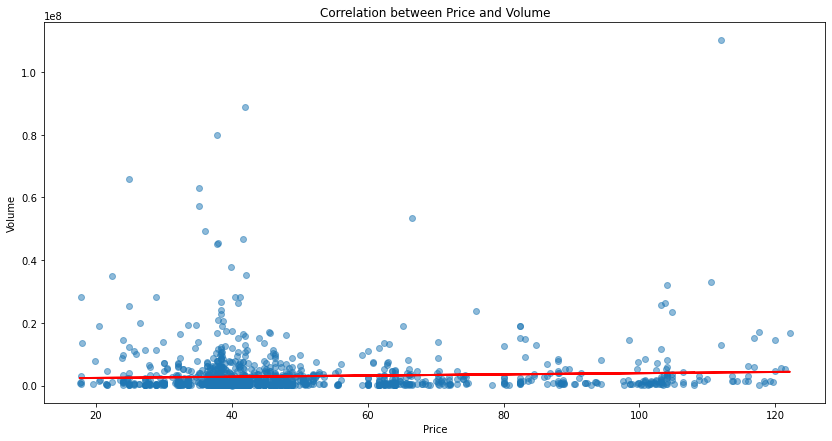

In [29]:
# Scatter plot
plt.figure(figsize=(14, 7))
plt.scatter(df['Price'], df['Vol.'], alpha=0.5)
plt.title('Correlation between Price and Volume')
plt.xlabel('Price')
plt.ylabel('Volume')

# Calculate the line of best fit
fit = np.polyfit(df['Price'], df['Vol.'], deg=1)
line = np.poly1d(fit)

# Plot the regression line
plt.plot(df['Price'], line(df['Price']), color='red', linewidth=2)

# Display the plot
plt.show()


In [30]:
correlation_coefficient = df['Price'].corr(df['Vol.'])
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.05466929343154238


__A correlation coefficient of approximately 0.05 indicates a very weak positive correlation between the 'Price' and 'Volume' variables. The scatter plot and the nearly straight line of best fit further support this observation.__

__In simpler terms, there doesn't seem to be a strong linear relationship between the 'Price' and 'Volume' columns in this data. The low correlation and the nearly horizontal line of best fit suggest that changes in the 'Price' are not consistently associated with changes in 'Volume' in a linear fashion.__

## FURTHER ANALYSIS

## Time Resampling

we use a process called time resampling to aggregate data into a defined time period, such as by month or by quarter. Institutions can then see an overview of stock prices and make decisions according to these trends.

In [31]:
year_resampling = df.resample(rule = 'A').mean()

In [32]:
year_resampling.head()

,Price,Open,High,Low,Vol.,Year
Date,,,,,,
2018-12-31,88.199153,88.562661,88.979315,87.331290,3.991740e+06,2018.0
2019-12-31,48.443239,48.501053,48.505263,48.299109,3.960539e+06,2019.0
2020-12-31,34.395984,34.400000,34.419598,34.294137,3.686093e+06,2020.0
2021-12-31,42.871774,42.887581,42.881129,42.807419,1.501187e+06,2021.0
2022-12-31,40.275726,40.266532,40.372500,40.063750,2.755791e+06,2022.0


Text(0.5, 1.0, 'Yearly Mean Price for NB')

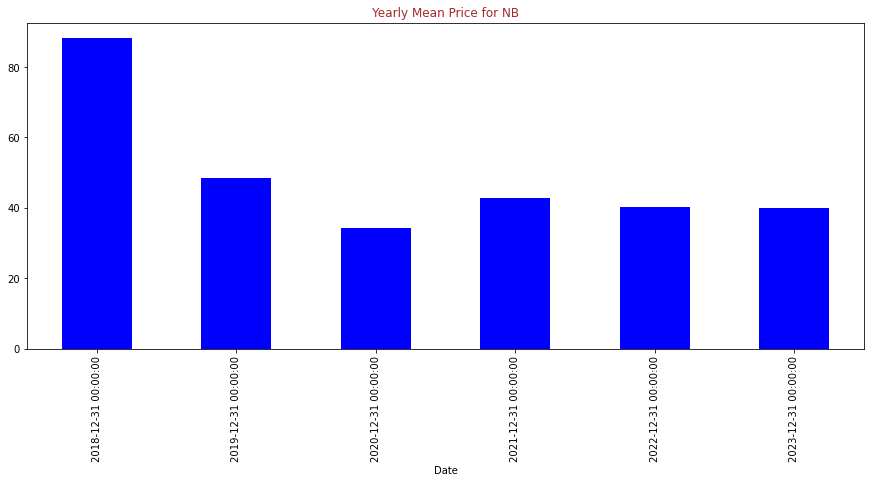

In [33]:
df['Price'].resample('A').mean().plot(kind='bar', figsize = (15,6), color='b')
plt.title('Yearly Mean Price for NB', color='brown')

Text(0.5, 1.0, 'Yearly Mean Volume for NB')

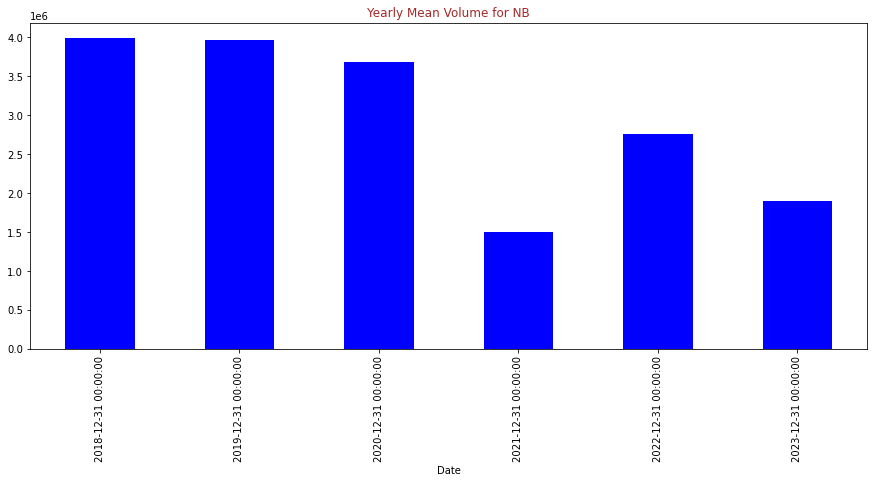

In [34]:
df['Vol.'].resample('A').mean().plot(kind='bar', figsize = (15,6), color='b')
plt.title('Yearly Mean Volume for NB', color='brown')

## Weekly Resampling

In [35]:
week_resampling = df.resample(rule = 'W').mean()

In [36]:

week_resampling.head()

,Price,Open,High,Low,Vol.,Year
Date,,,,,,
2018-01-07,108.830,108.6875,109.480,108.090,8981610.0,2018.0
2018-01-14,116.756,117.8300,118.904,115.288,32180000.0,2018.0
2018-01-21,116.608,115.0720,117.336,114.346,2558000.0,2018.0
2018-01-28,117.738,115.6880,117.998,115.686,2415856.0,2018.0
2018-02-04,118.144,118.2080,119.040,117.568,7626256.0,2018.0


Text(0.5, 1.0, 'Weekly Mean Price for NB')

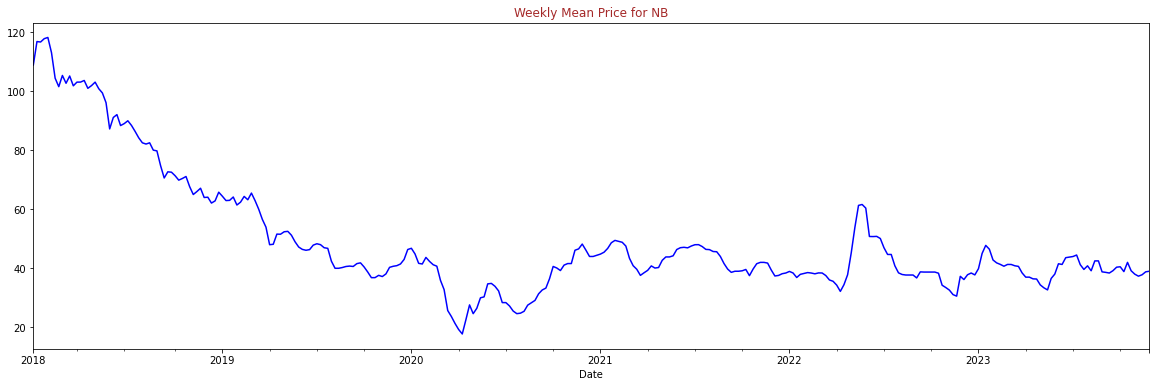

In [37]:
week_resampling['Price'].plot(kind='line', figsize = (20,6), color='b')
plt.title('Weekly Mean Price for NB', color='brown')

## Week Resampling (Volume)

Text(0.5, 1.0, 'Weekly Mean Volume for NB')

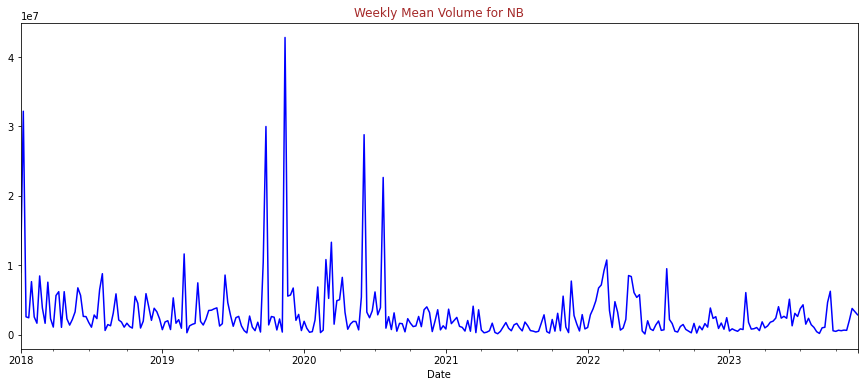

In [38]:
week_resampling['Vol.'].plot(kind='line', figsize = (15,6), color='b')
plt.title('Weekly Mean Volume for NB', color='brown')

## Month Resampling (Price)

In [39]:
month_resampling = df.resample(rule = 'M').mean()
month_resampling.head(12)

,Price,Open,High,Low,Vol.,Year
Date,,,,,,
2018-01-31,115.837727,115.320909,116.850455,114.345455,1.172253e+07,2018.0
2018-02-28,107.204000,108.696000,108.740000,105.964000,3.986718e+06,2018.0
2018-03-31,103.299048,104.011429,104.011429,102.274286,3.144846e+06,2018.0
2018-04-30,102.392000,102.612000,103.164000,101.544000,4.743586e+06,2018.0
2018-05-31,97.885714,98.834286,99.097143,97.081905,2.362581e+06,2018.0
2018-06-30,89.680000,90.202105,90.576842,89.145263,3.837131e+06,2018.0
2018-07-31,86.890909,87.225455,87.512727,86.123636,3.025581e+06,2018.0
2018-08-31,81.249524,81.520000,81.447619,80.716190,3.337400e+06,2018.0
2018-09-30,72.636000,72.892000,73.324000,71.760000,2.710135e+06,2018.0


Text(0.5, 1.0, 'Monthly Mean Price for NB')

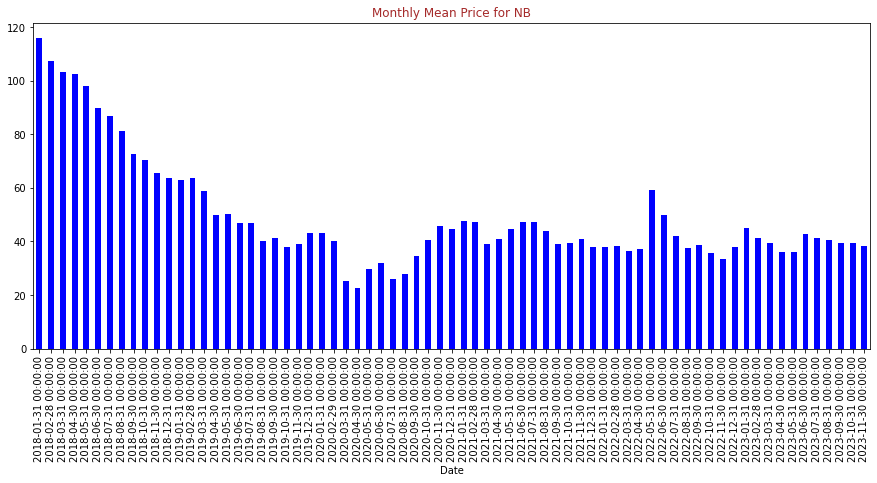

In [40]:
month_resampling['Price'].plot(kind='bar', figsize = (15,6), color='b')
plt.title('Monthly Mean Price for NB', color='brown')

## Month Resampling (Volume)

Text(0.5, 1.0, 'Monthly Mean Volume for NB')

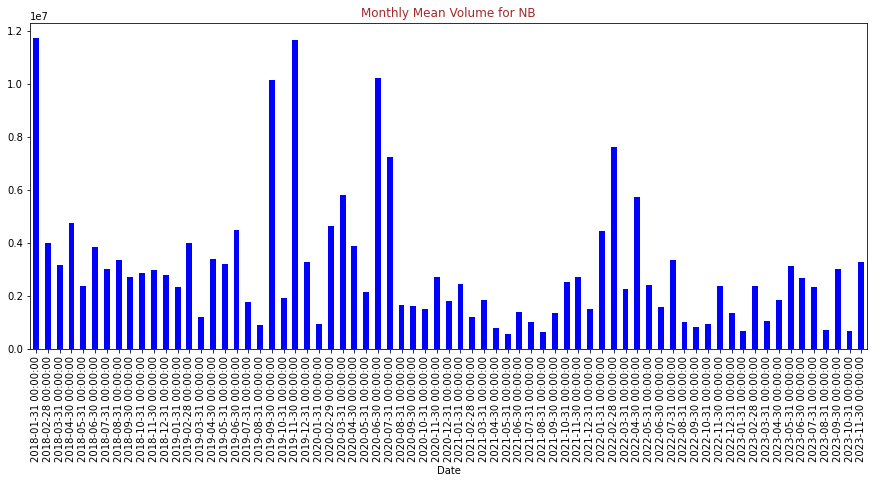

In [41]:
month_resampling['Vol.'].plot(kind='bar', figsize = (15,6), color='b')
plt.title('Monthly Mean Volume for NB', color='brown')

## TEST FOR SEASONALITY

### Components of Time Series :

A Time Series consists of the following components :

__Trend :__ Long term direction of the data.


__Seasonality :__ Short term repetitve patterns of the data due to the seasons.


__Cyclic Variations :__ Short term repetitive patterns of the data over a period of 1 year.

 

__Irregularities :__ Random and unforseen fluctuations in the data.

 
In order to assess a Time Series, we need to consider the above components and make sure that our data is free from all these components in order to make a forecast.

__To visualize the Price and Volume for the above components, we use a function seasonal_decompose from the statsmodel library.__


### Weekly Resampling (Price)

<Figure size 1008x504 with 0 Axes>

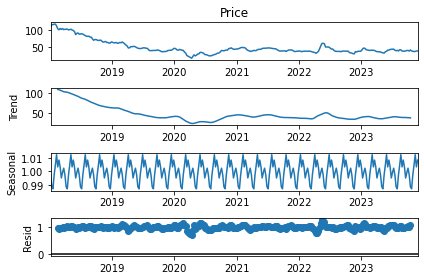

In [42]:
dec = sm.tsa.seasonal_decompose(df['Price'].resample(rule = 'W').mean(), model='multiplicative', period=12)
plt.figure(figsize=(14, 7))
dec.plot()
plt.show()

__Data might have a non-linear downtrend.__

__A seasonal pattern may be present in the data.__

__The last plot is the Residual plot. It is the plot that describes the data if the trend and seasonal components of the data are completely eliminated.__

### Monthly Resampling (Price)

<Figure size 1008x504 with 0 Axes>

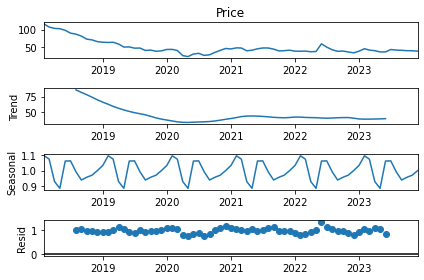

In [43]:
dec = sm.tsa.seasonal_decompose(df['Price'].resample(rule = 'M').mean(), model='multiplicative', period=12)
plt.figure(figsize=(14, 7))
dec.plot()
plt.show()

__From the chart above, we can see that the prices generally open high at the beginning of each year then it drops to its lowest at the end of the first quarter after which it rises again. This happened continuously over the past five years.__

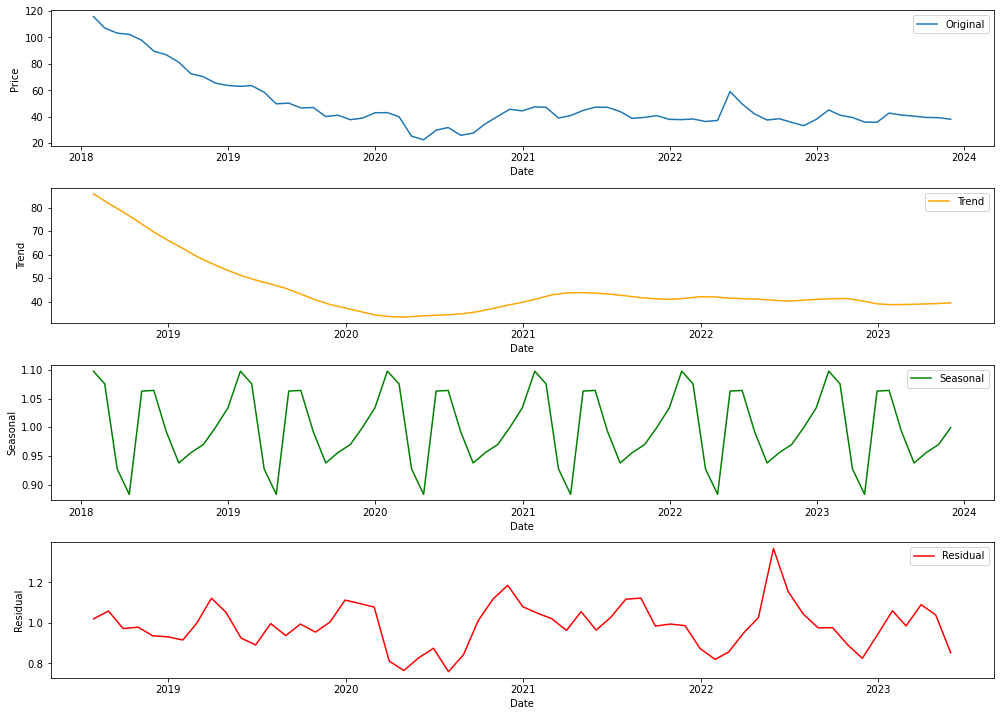

In [44]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming df['Price'] is your time series
resample_price = df['Price'].resample(rule='M').mean()

decomposition = sm.tsa.seasonal_decompose(resample_price, model='multiplicative', period=12)

# Set up the figure
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 10))

# Plot original time series
axes[0].plot(resample_price.index, resample_price, label='Original')
axes[0].set_ylabel('Price')
axes[0].legend()

# Plot trend component
axes[1].plot(decomposition.trend, label='Trend', color='orange')
axes[1].set_ylabel('Trend')
axes[1].legend()

# Plot seasonal component
axes[2].plot(decomposition.seasonal, label='Seasonal', color='green')
axes[2].set_ylabel('Seasonal')
axes[2].legend()

# Plot residual component
axes[3].plot(decomposition.resid, label='Residual', color='red')
axes[3].set_ylabel('Residual')
axes[3].legend()

# Add data labels
for ax in axes:
    ax.set_xlabel('Date')

plt.tight_layout()
plt.show()


## TEST FOR NORMALITY

In [45]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df['Price'])
print(f"Shapiro-Wilk test: Statistics={stat}, p-value={p_value}")

Shapiro-Wilk test: Statistics=0.7876116633415222, p-value=5.818611613415938e-40


### NORMALITY OF RESIDUA

In [46]:
tat, p_value = shapiro(decomposition.resid)
print(f"Shapiro-Wilk test: Statistics={stat}, p-value={p_value}")

Shapiro-Wilk test: Statistics=0.7876116633415222, p-value=1.0


## TEST FOR STATONARITY


__Stationarity :__

Stationarity is a concept for time series where statistical parameters like mean, variance, etc are all constant over time.

For a time series, features are dependent on time i.e features are a function of time. Statistical paramters will change values over time as they are extracted from the features.

If the time series is not stationary, then the predictions deviate from the original values and increase the error as we don't know the changes in these statistical parameters as they are a function of time.Thus, by making time series stationary, we kind of nullify the effects of statistical parameters on the forecast.
    
To test stationarity, we will use Augmented Dickey Fuller Test :
        Null Hypothesis : It assumes that the time series is non-stationary.
        Alternate Hypothesis : If the null hypothesis is rejected, then the time series is stationary.
        Output of the Augmented Dickey Fuller Test include :
            Test Statistic
            p-value
            #Lags Used
            Number of Observations Used
            Critical Value (1%)
            Critical Value (5%)
            Critical Value (10%)
    For the Null Hypothesis to be rejected and accepting that the time series is stationary, there are 2 requirements :
        Critical Value (5%) > Test Statistic
        p-value < 0.05



In [47]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window = 12).mean()
    MSTD = timeseries.rolling(window = 12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

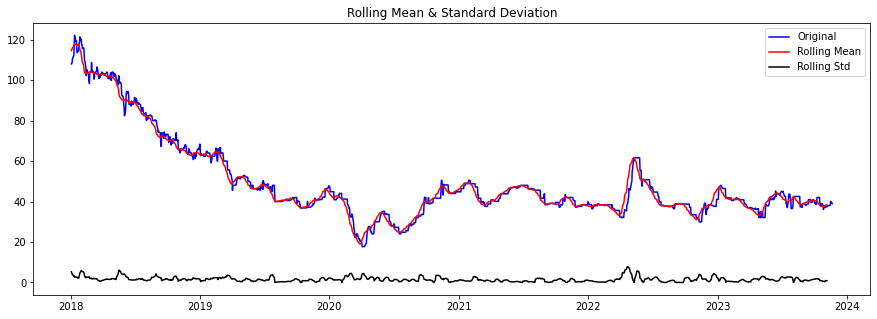

Results of Dickey-Fuller Test:
Test Statistic                    0.377944
p-value                           0.980651
#Lags Used                        1.000000
Number of Observations Used    1458.000000
Critical Value (1%)              -3.434843
Critical Value (5%)              -2.863524
Critical Value (10%)             -2.567826
dtype: float64


In [48]:
test_stationarity(df['Price'])

For the Price time series data,

Rolling Mean is clearly variable with time. It is very close to the data. Thus, it can be a good descriptor of the data.
    
Rolling Standard Deviation is consistent
    
Test Statistic : (0.3779) > Critical Value (5%) : (-2.863)

p-value (0.98) > 0.05

__REMEBER__

For the Null Hypothesis to be rejected and accepting that the time series is stationary, there are 2 requirements :

Critical Value (5%) > Test Statistic

p-value < 0.05



### OR

In [49]:
from statsmodels.tsa.stattools import adfuller

# Assume 'time_series' is your time series data
result = adfuller(df['Price'])

# Extract and print the results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Check for stationarity based on the p-value
if p_value <= 0.05:
    print('Reject the null hypothesis: Time series is stationary.')
else:
    print('Fail to reject the null hypothesis: Time series is non-stationary.')


ADF Statistic: 0.3779438804851889
p-value: 0.980651119163487
Critical Values:
   1%: -3.434843038681996
   5%: -2.8635243777871286
   10%: -2.56782646544019
Fail to reject the null hypothesis: Time series is non-stationary.


## TEST FOR STATIONARITY AFTER DIFFERENCING

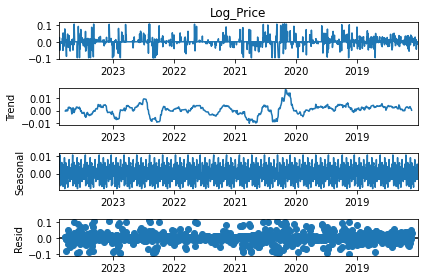

In [50]:
df['Log_Price'] = np.log(df['Price'])
data_log_diff = df['Log_Price'].diff()
data_log_diff = data_log_diff.dropna()

dec = sm.tsa.seasonal_decompose(data_log_diff,period = 52).plot()
plt.show()

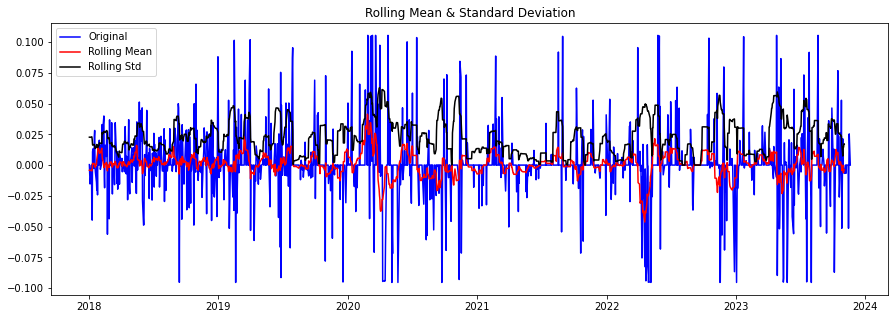

Results of Dickey-Fuller Test:
Test Statistic                  -34.394007
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1458.000000
Critical Value (1%)              -3.434843
Critical Value (5%)              -2.863524
Critical Value (10%)             -2.567826
dtype: float64


In [51]:
test_stationarity(data_log_diff)

Critical Value (5%) : (-2.86) > Test Statistic : (-34.39). We can say that the time series is stationary

Test Statistic is less than Critical Value (1%).
   
0.05 > p-value (0.00)

From these outputs, we can reject the Null Hypothesis and accept the Alternate Hypothesis i.e we can say that the above time series is stationary.


In [52]:
def tsplot(data, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(data, pd.Series):
        data = pd.Series(data)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        data.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(data)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(data, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(data, lags=lags, ax=pacf_ax)
        plt.tight_layout()

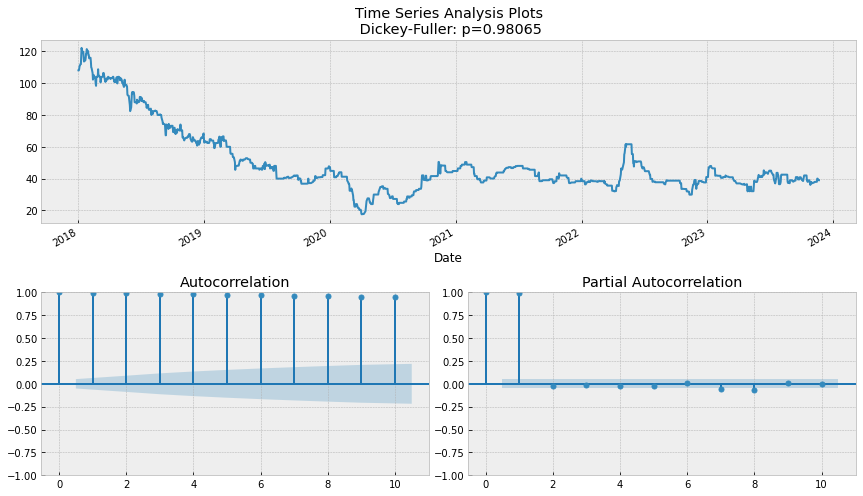

In [53]:
tsplot(df['Price'],lags = 10)

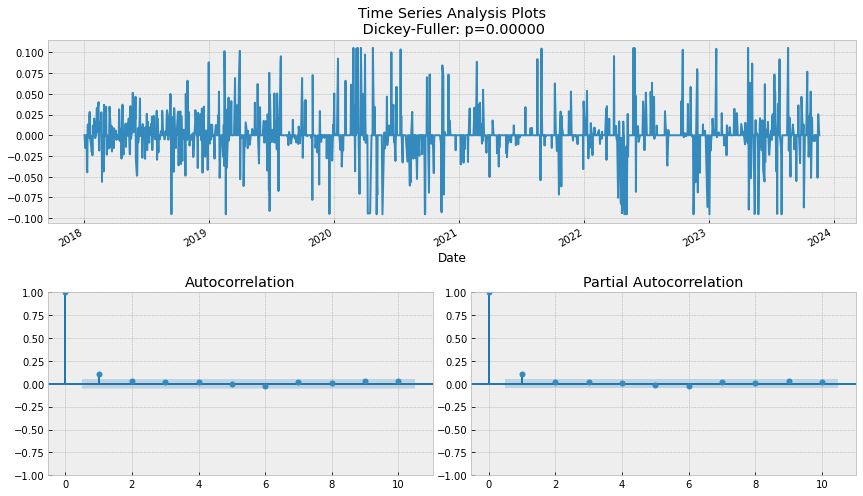

In [54]:
tsplot(data_log_diff,lags = 10)

## FORECASTING

### VAR

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import warnings
warnings.filterwarnings('ignore')

In [56]:
df.head()

,Price,Open,High,Low,Vol.,Change %,Year,Month,Log_Price
Date,,,,,,,,,
2023-11-21,39.0,39.0,39.0,37.55,279130.0,0.00%,2023,November,3.663562
2023-11-20,39.0,40.0,39.0,39.00,5420000.0,-2.50%,2023,November,3.663562
2023-11-17,40.0,40.0,39.0,38.50,442820.0,0.00%,2023,November,3.688879
2023-11-16,40.0,38.0,40.0,38.00,2750000.0,5.26%,2023,November,3.688879
2023-11-15,38.0,38.0,38.0,38.00,1550000.0,0.00%,2023,November,3.637586


In [57]:
dfv = df[['Price', 'Vol.']]

In [58]:


ad_fuller_result_1 = adfuller(dfv['Price'].diff()[1:])

print('Price')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(dfv['Vol.'].diff()[1:])

print('Volume')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')
     


Price
ADF Statistic: -36.52136756072038
p-value: 0.0

---------------------

Volume
ADF Statistic: -15.523152884300972
p-value: 2.2699016137536454e-28


In [59]:
print('Price causes Volume?\n')
print('------------------')
granger_1 = grangercausalitytests(dfv[['Vol.', 'Price']], 4)

print('Volume causes Price?\n')
print('------------------')
granger_2 = grangercausalitytests(dfv[['Price', 'Vol.']], 4)

Price causes Volume?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6019  , p=0.1069  , df_denom=1456, df_num=1
ssr based chi2 test:   chi2=2.6073  , p=0.1064  , df=1
likelihood ratio test: chi2=2.6050  , p=0.1065  , df=1
parameter F test:         F=2.6019  , p=0.1069  , df_denom=1456, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.9531  , p=0.0027  , df_denom=1453, df_num=2
ssr based chi2 test:   chi2=11.9472 , p=0.0025  , df=2
likelihood ratio test: chi2=11.8985 , p=0.0026  , df=2
parameter F test:         F=5.9531  , p=0.0027  , df_denom=1453, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.9406  , p=0.0020  , df_denom=1450, df_num=3
ssr based chi2 test:   chi2=14.8934 , p=0.0019  , df=3
likelihood ratio test: chi2=14.8178 , p=0.0020  , df=3
parameter F test:         F=4.9406  , p=0.0020  , df_denom=1450, df_num=3

Granger Causality
number of lags (no zero) 4
s

In [60]:
train_df=dfv[:-100]
test_df=dfv[-100:]

len(train_df)

1360

In [61]:
train_df.head()

,Price,Vol.
Date,,
2023-11-21,39.0,279130.0
2023-11-20,39.0,5420000.0
2023-11-17,40.0,442820.0
2023-11-16,40.0,2750000.0
2023-11-15,38.0,1550000.0


In [62]:
model = VAR(train_df.diff()[1:])

In [63]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        32.11       32.12   8.807e+13       32.11
1        31.96       31.98   7.574e+13       31.97
2        31.85      31.89*   6.799e+13       31.86
3        31.84       31.89   6.724e+13       31.86
4        31.82       31.89   6.598e+13       31.85
5        31.81       31.89   6.526e+13       31.84
6        31.79       31.90   6.430e+13      31.83*
7        31.79       31.91   6.397e+13       31.83
8        31.79       31.92   6.377e+13       31.84
9        31.78       31.93   6.355e+13       31.84
10       31.78       31.94   6.307e+13       31.84
11       31.77       31.95   6.300e+13       31.84
12       31.77       31.96   6.276e+13       31.84
13       31.77       31.98   6.303e+13       31.85
14       31.77       32.00   6.296e+13       31.86
15      31.77*       32.01  6.264e+13*       31.86
16       31.77       32.03   6.

## VAR(15,0)

In [64]:
var_model = VARMAX(train_df, order=(15,0),enforce_stationarity= True)
results = var_model.fit(disp=False)
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:      ['Price', 'Vol.']   No. Observations:                 1360
Model:                        VAR(15)   Log Likelihood              -25363.417
                          + intercept   AIC                          50856.834
Date:                Tue, 28 Nov 2023   BIC                          51195.825
Time:                        17:07:02   HQIC                         50983.740
Sample:                             0                                         
                               - 1360                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.02, 0.00   Jarque-Bera (JB):   2205.82, 194050.76
Prob(Q):                        0.88, 0.99   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.46, 3.77   Skew:                       0.14, 6.05
Prob(H) (two-sided):            0.00,

In [65]:
#To Predict the thrity values of Price and Volume in the data
predict = results.get_prediction(start=0,end=29)

predictions=predict.predicted_mean

In [66]:
predictions.columns=['Price_P','Volume_P']
predictions

,Price_P,Volume_P
Date,,
2023-11-21,48.212708,2.902427e+06
2023-11-20,39.006908,2.166543e+06
2023-11-17,38.984745,3.575469e+06
2023-11-16,40.062676,1.655152e+06
2023-11-15,40.022163,3.406146e+06
2023-11-14,37.892067,2.778369e+06
2023-11-13,37.977271,1.985216e+06
2023-11-10,38.037998,5.084490e+06
2023-11-09,38.093165,4.621170e+06


In [67]:
data = dfv.head(30)
check =pd.concat([data,predictions],axis=1)
check

,Price,Vol.,Price_P,Volume_P
Date,,,,
2023-11-21,39.00,279130.0,48.212708,2.902427e+06
2023-11-20,39.00,5420000.0,39.006908,2.166543e+06
2023-11-17,40.00,442820.0,38.984745,3.575469e+06
2023-11-16,40.00,2750000.0,40.062676,1.655152e+06
2023-11-15,38.00,1550000.0,40.022163,3.406146e+06
2023-11-14,38.00,175050.0,37.892067,2.778369e+06
2023-11-13,38.00,11560000.0,37.977271,1.985216e+06
2023-11-10,38.00,7690000.0,38.037998,5.084490e+06
2023-11-09,38.00,2450000.0,38.093165,4.621170e+06


In [68]:
train_df.tail()

,Price,Vol.
Date,,
2018-06-01,82.40,15110000.0
2018-05-31,86.32,6980000.0
2018-05-30,88.00,4040000.0
2018-05-28,92.00,802000.0
2018-05-25,92.32,957780.0


In [69]:
n_forecast = 30
predict = results.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)
predictions = predict.predicted_mean

In [70]:
predictions.columns=['Price_P','Volume_P']
predictions

,Price_P,Volume_P
1360,92.151411,1.170442e+06
1361,91.830022,9.495314e+05
1362,91.499429,1.708887e+06
1363,91.218722,1.109698e+06
1364,90.928222,2.392335e+06
1365,91.004604,2.168539e+06
1366,91.054483,3.607513e+06
1367,91.261571,3.862731e+06
1368,91.425607,4.472818e+06
1369,91.627137,3.053678e+06


In [71]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

<AxesSubplot:>

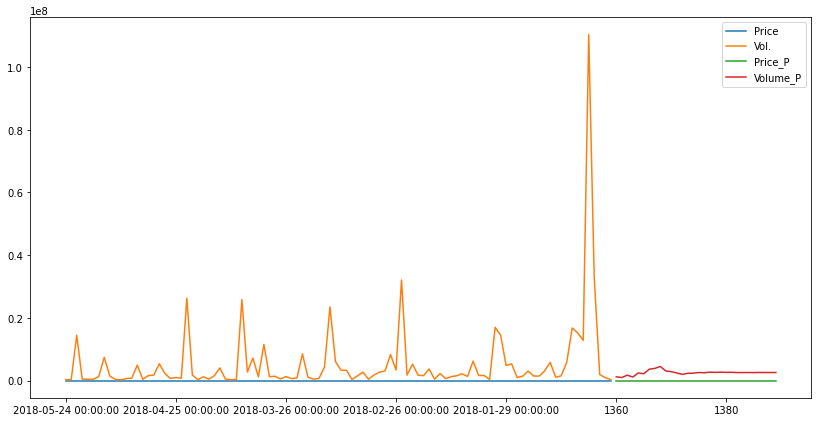

In [72]:
test_vs_pred.plot(figsize=(14,7))

## VAR(2,0)

In [73]:
var_model = VARMAX(train_df, order=(2,0),enforce_stationarity= True)
results = var_model.fit(disp=False)
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:      ['Price', 'Vol.']   No. Observations:                 1360
Model:                         VAR(2)   Log Likelihood              -54390.613
                          + intercept   AIC                         108807.226
Date:                Tue, 28 Nov 2023   BIC                         108875.024
Time:                        17:07:15   HQIC                        108832.607
Sample:                             0                                         
                               - 1360                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):               nan, nan   Jarque-Bera (JB):   217737.01, 94074.37
Prob(Q):                          nan, nan   Prob(JB):                    0.00, 0.00
Heteroskedasticity (H):         1.40, 3.39   Skew:                       -6.69, 4.20
Prob(H) (two-sided):            0.

## VAR(6,0)

In [74]:
var_model = VARMAX(train_df, order=(2,0),enforce_stationarity= True)
results = var_model.fit(disp=False)
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:      ['Price', 'Vol.']   No. Observations:                 1360
Model:                         VAR(2)   Log Likelihood              -54390.613
                          + intercept   AIC                         108807.226
Date:                Tue, 28 Nov 2023   BIC                         108875.024
Time:                        17:07:26   HQIC                        108832.607
Sample:                             0                                         
                               - 1360                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):               nan, nan   Jarque-Bera (JB):   217737.01, 94074.37
Prob(Q):                          nan, nan   Prob(JB):                    0.00, 0.00
Heteroskedasticity (H):         1.40, 3.39   Skew:                       -6.69, 4.20
Prob(H) (two-sided):            0.

# VARIMA

In [75]:
dfva = df[['Price', 'Vol.']]

In [76]:
dfva.head()

,Price,Vol.
Date,,
2023-11-21,39.0,279130.0
2023-11-20,39.0,5420000.0
2023-11-17,40.0,442820.0
2023-11-16,40.0,2750000.0
2023-11-15,38.0,1550000.0


In [77]:
model = VAR(train_df.diff()[1:])

In [78]:
varima_model = VARMAX(train_df, order=(15,0,0),enforce_stationarity= True)
results = varima_model.fit(disp=False)
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:      ['Price', 'Vol.']   No. Observations:                 1360
Model:                        VAR(15)   Log Likelihood              -25363.417
                          + intercept   AIC                          50856.834
Date:                Tue, 28 Nov 2023   BIC                          51195.825
Time:                        17:07:48   HQIC                         50983.740
Sample:                             0                                         
                               - 1360                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.02, 0.00   Jarque-Bera (JB):   2205.82, 194050.76
Prob(Q):                        0.88, 0.99   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.46, 3.77   Skew:                       0.14, 6.05
Prob(H) (two-sided):            0.00,

In [79]:
varima_model = VARMAX(train_df, order=(2,1,0),enforce_stationarity= True)
results = varima_model.fit(disp=False)
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:      ['Price', 'Vol.']   No. Observations:                 1360
Model:                     VARMA(2,1)   Log Likelihood              -37142.940
                          + intercept   AIC                          74319.880
Date:                Tue, 28 Nov 2023   BIC                          74408.539
Time:                        17:08:43   HQIC                         74353.071
Sample:                             0                                         
                               - 1360                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):           4.87, 331.42   Jarque-Bera (JB):   62947.24, 60620.31
Prob(Q):                        0.03, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.31, 1.94   Skew:                      -3.77, 3.87
Prob(H) (two-sided):            0.00,

In [80]:
varima_model = VARMAX(train_df, order=(6,1,2),enforce_stationarity= True)
results = varima_model.fit(disp=False)
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:      ['Price', 'Vol.']   No. Observations:                 1360
Model:                     VARMA(6,1)   Log Likelihood              -27834.472
                          + intercept   AIC                          55734.945
Date:                Tue, 28 Nov 2023   BIC                          55907.048
Time:                        17:09:49   HQIC                         55799.374
Sample:                             0                                         
                               - 1360                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):          571.27, 97.78   Jarque-Bera (JB):    479.68, 222542.64
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         2.34, 4.49   Skew:                       1.22, 6.63
Prob(H) (two-sided):            0.00,

### ARIMA



- ARIMA model is a combination of 3 models :
          AR (p) : Auto Regressive
          I (d) : Integrated
          MA (q) : Moving Average

- (p,d,q) is known as the order of the ARIMA model. Values of these parameters are based on the above mentioned models.
          p : Number of auto regressive terms.
          d : Number of differencing orders required to make the time series stationary.
          q : Number of lagged forecast errors in the prediction equation.


In [81]:
df.head()

,Price,Open,High,Low,Vol.,Change %,Year,Month,Log_Price
Date,,,,,,,,,
2023-11-21,39.0,39.0,39.0,37.55,279130.0,0.00%,2023,November,3.663562
2023-11-20,39.0,40.0,39.0,39.00,5420000.0,-2.50%,2023,November,3.663562
2023-11-17,40.0,40.0,39.0,38.50,442820.0,0.00%,2023,November,3.688879
2023-11-16,40.0,38.0,40.0,38.00,2750000.0,5.26%,2023,November,3.688879
2023-11-15,38.0,38.0,38.0,38.00,1550000.0,0.00%,2023,November,3.637586


In [82]:
dfa = df[['Price']]

In [83]:
dfa.tail()

,Price
Date,
2018-01-08,112.00
2018-01-05,110.48
2018-01-04,108.80
2018-01-03,108.00
2018-01-02,108.04


In [84]:
dfa = dfa[::-1]

In [85]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(dfa['Price'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4852.401, Time=2.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4847.321, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4846.521, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4846.489, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4847.337, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4848.440, Time=0.60 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4848.451, Time=0.82 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4850.438, Time=1.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4846.339, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4848.310, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=4848.318, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4846.366, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4850.309, Time=0.59 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 7.739 seconds


In [86]:
from statsmodels.tsa.arima.model import ARIMA
model=sm.tsa.statespace.SARIMAX(dfa['Price'],order=(0, 1, 1),seasonal_order=(0,1,1,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1460
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2433.090
Date:                            Tue, 28 Nov 2023   AIC                           4872.179
Time:                                    17:10:07   BIC                           4888.011
Sample:                                         0   HQIC                          4878.088
                                           - 1460                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0438      0.018      2.400      0.016       0.008       0.080
ma.S.L12      -0.9921      0.018    -53.899      0.000      -1.028      -0.956
sigma2         1.6355      0.040     40.608      0.000       1.557       1.714
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1658.72
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
model=sm.tsa.statespace.SARIMAX(dfa['Price'],order=(2, 1, 2),seasonal_order=(2,1,2,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1460
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -2431.336
Date:                            Tue, 28 Nov 2023   AIC                           4880.672
Time:                                    17:11:48   BIC                           4928.167
Sample:                                         0   HQIC                          4898.398
                                           - 1460                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5306      1.120      0.474      0.636      -1.665       2.727
ar.L2          0.2471      0.434      0.570      0.569      -0.603       1.097
ma.L1         -0.4865      1.121     -0.434      0.664      -2.684       1.711
ma.L2         -0.2755      0.422     -0.652      0.514      -1.103       0.552
ar.S.L12      -0.9744      0.034    -28.984      0.000      -1.040      -0.908
ar.S.L24       0.0088      0.025      0.348      0.728      -0.041       0.058
ma.S.L12      -0.0033     36.645  -8.91e-05      1.000     -71.826      71.820
ma.S.L24      -0.9967     36.518     -0.027      0.978     -72.571      70.577
sigma2         1.6161     59.205      0.027      0.978    -114.424     117.657
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1625.68
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
model=sm.tsa.statespace.SARIMAX(dfa['Price'],order=(0, 1, 0),seasonal_order=(0,1,0,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1460
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -2886.453
Date:                            Tue, 28 Nov 2023   AIC                           5774.906
Time:                                    17:11:48   BIC                           5780.183
Sample:                                         0   HQIC                          5776.875
                                           - 1460                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         3.1635      0.071     44.517      0.000       3.024       3.303
===================================================================================
Ljung-Box (L1) (Q):                   1.12   Jarque-Bera (JB):               730.13
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
model=sm.tsa.statespace.SARIMAX(dfa['Price'],order=(1, 1, 0),seasonal_order=(1,1,0,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1460
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood               -2703.824
Date:                            Tue, 28 Nov 2023   AIC                           5413.649
Time:                                    17:11:49   BIC                           5429.480
Sample:                                         0   HQIC                          5419.557
                                           - 1460                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0384      0.022      1.738      0.082      -0.005       0.082
ar.S.L12      -0.4740      0.016    -29.815      0.000      -0.505      -0.443
sigma2         2.4526      0.056     43.875      0.000       2.343       2.562
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               702.58
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
model=sm.tsa.statespace.SARIMAX(dfa['Price'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1460
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2432.855
Date:                            Tue, 28 Nov 2023   AIC                           4875.711
Time:                                    17:12:08   BIC                           4902.097
Sample:                                         0   HQIC                          4885.558
                                           - 1460                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1331      0.424     -0.314      0.754      -0.965       0.698
ma.L1          0.1762      0.421      0.418      0.676      -0.649       1.002
ar.S.L12       0.0188      0.023      0.809      0.418      -0.027       0.064
ma.S.L12      -0.9988      0.116     -8.618      0.000      -1.226      -0.772
sigma2         1.6263      0.186      8.749      0.000       1.262       1.991
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1650.01
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
model=sm.tsa.statespace.SARIMAX(dfa['Price'],order=(0, 1, 2),seasonal_order=(0,1,2,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1460
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -2432.839
Date:                            Tue, 28 Nov 2023   AIC                           4875.678
Time:                                    17:12:37   BIC                           4902.065
Sample:                                         0   HQIC                          4885.526
                                           - 1460                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0434      0.018      2.344      0.019       0.007       0.080
ma.L2         -0.0048      0.018     -0.265      0.791      -0.040       0.031
ma.S.L12      -0.9754      0.032    -30.099      0.000      -1.039      -0.912
ma.S.L24      -0.0195      0.023     -0.840      0.401      -0.065       0.026
sigma2         1.6319      0.052     31.628      0.000       1.531       1.733
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1650.71
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
model=sm.tsa.statespace.SARIMAX(dfa['Price'],order=(1, 1, 2),seasonal_order=(1,1,2,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1460
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood               -2431.445
Date:                            Tue, 28 Nov 2023   AIC                           4876.891
Time:                                    17:13:39   BIC                           4913.832
Sample:                                         0   HQIC                          4890.677
                                           - 1460                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7216      9.340      0.077      0.938     -17.584      19.027
ma.L1         -0.6765      9.342     -0.072      0.942     -18.986      17.633
ma.L2         -0.0318      0.430     -0.074      0.941      -0.875       0.812
ar.S.L12      -0.9799      0.028    -34.513      0.000      -1.036      -0.924
ma.S.L12      -0.0068      8.072     -0.001      0.999     -15.828      15.815
ma.S.L24      -0.9932      8.013     -0.124      0.901     -16.698      14.711
sigma2         1.6179     13.050      0.124      0.901     -23.959      27.195
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1628.88
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
dfa.head()

,Price
Date,
2018-01-02,108.04
2018-01-03,108.00
2018-01-04,108.80
2018-01-05,110.48
2018-01-08,112.00


In [94]:
dfa.tail()

,Price
Date,
2023-11-15,38.0
2023-11-16,40.0
2023-11-17,40.0
2023-11-20,39.0
2023-11-21,39.0


In [95]:
from statsmodels.tsa.arima.model import ARIMA
model=sm.tsa.statespace.SARIMAX(dfa['Price'],order=(0, 1, 1),seasonal_order=(0,1,1,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1460
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2433.090
Date:                            Tue, 28 Nov 2023   AIC                           4872.179
Time:                                    17:13:46   BIC                           4888.011
Sample:                                         0   HQIC                          4878.088
                                           - 1460                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0438      0.018      2.400      0.016       0.008       0.080
ma.S.L12      -0.9921      0.018    -53.899      0.000      -1.028      -0.956
sigma2         1.6355      0.040     40.608      0.000       1.557       1.714
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1658.72
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

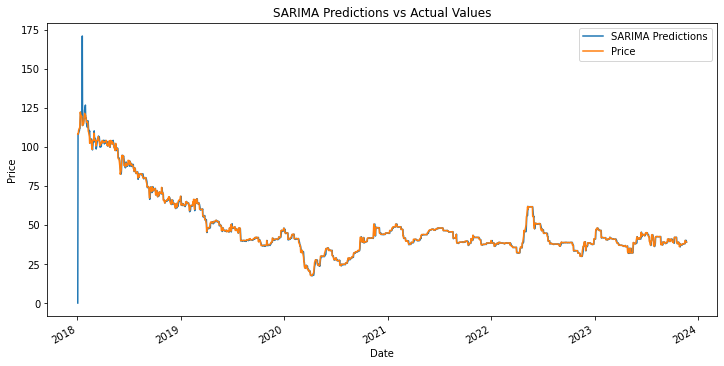

In [96]:
start_index = dfa.index.get_loc('2018-01-02')
end_index = dfa.index.get_loc('2023-11-21')

# Make predictions
pred = results.predict(start=start_index, end=end_index, typ='levels').rename('SARIMA Predictions')

# Plotting
plt.figure(figsize=(12, 6))
pred.plot(legend=True)
dfa['Price'].plot(legend=True)
plt.title('SARIMA Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [97]:
dfa['Pred'] = pred
dfa.head(20)

,Price,Pred
Date,,
2018-01-02,108.04,0.000000
2018-01-03,108.00,108.040008
2018-01-04,108.80,108.000000
2018-01-05,110.48,108.800000
2018-01-08,112.00,110.480000
2018-01-09,112.00,112.000000
2018-01-10,116.80,112.000000
2018-01-11,122.14,116.800001
2018-01-12,120.84,122.140001


In [98]:
dfa.tail()

,Price,Pred
Date,,
2023-11-15,38.0,37.981804
2023-11-16,40.0,37.990224
2023-11-17,40.0,40.075249
2023-11-20,39.0,40.045696
2023-11-21,39.0,38.907738


## MODEL EVALUATION (LJUNGBOX TEST)

In [99]:
dfa['residuals'] = dfa['Price'] - dfa['Pred']

In [100]:
sm.stats.acorr_ljungbox(dfa['residuals'], lags=[1], return_df=True)

,lb_stat,lb_pvalue
1,0.145522,0.702852


# FORECASTING

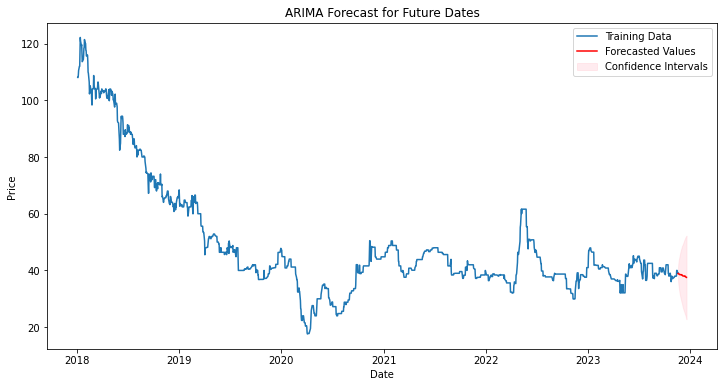

             forecast
2023-11-21  38.878488
2023-11-22  38.932465
2023-11-23  38.931035
2023-11-24  38.813906
2023-11-25  38.647285
2023-11-26  38.558861
2023-11-27  38.535079
2023-11-28  38.516191
2023-11-29  38.526931
2023-11-30  38.514248
2023-12-01  38.552122
2023-12-02  38.506175
2023-12-03  38.380663
2023-12-04  38.434639
2023-12-05  38.433210
2023-12-06  38.316081
2023-12-07  38.149460
2023-12-08  38.061036
2023-12-09  38.037254
2023-12-10  38.018366
2023-12-11  38.029106
2023-12-12  38.016423
2023-12-13  38.054297
2023-12-14  38.008349
2023-12-15  37.882837
2023-12-16  37.936814
2023-12-17  37.935384
2023-12-18  37.818255
2023-12-19  37.651634
2023-12-20  37.563210
2023-12-21  37.539428


In [101]:
# Set the number of periods you want to forecast into the future
forecast_periods = 31  # Adjust this based on your desired forecast horizon

# Get the forecast results
forecast_results = results.get_forecast(steps=forecast_periods)

# Extract the forecasted values and confidence intervals
forecast_values = forecast_results.predicted_mean
confidence_intervals = forecast_results.conf_int()

# Create a DataFrame for the forecasted values
future_df = pd.DataFrame(index=pd.date_range(start='2023-11-21', periods=forecast_periods, freq='D'))
future_df['forecast'] = forecast_values.values

# Plot the forecasted values and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(dfa.index, dfa['Price'], label='Training Data')  # Plot training data
plt.plot(future_df.index, future_df['forecast'], label='Forecasted Values', color='red')  # Plot forecast
plt.fill_between(future_df.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Intervals')
plt.title('ARIMA Forecast for Future Dates')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Display the forecast DataFrame
print(future_df)
